In [22]:
#import libraries and xml file for face detection
import re
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [23]:
def read_file(file, scale_factor):
    
    #read in pixelvalues
    contents = Path(file).read_text()
    
    # Make a list of anything that looks like numbers using a regex...
    # ... taking first as height, second as width and remainder as pixels
    h, w, *pixels = re.findall(r'[0-9]+', contents)
    
    #convert the pixels to an array and return an array
    na = np.array(pixels, dtype = np.uint8).reshape((int(h), int(w), 3))
    cv2.imwrite('img.png', na)
    
    #read in the image file and convert to grayscale and display
    test_image = cv2.imread('img.png')
    gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image, cmap='gray')
    
    #detecting the faces in the image
    faces_rects = haar_cascade_face.detectMultiScale(gray_image, scaleFactor = scale_factor, minNeighbors = 3, minSize = (30, 30))
    for (x, y, w, h) in faces_rects:
        cv2.rectangle(test_image, (x, y), (x+w, y+h), (255, 125, 0), 2)
        
    return ('{} face(s) detected in this file'.format(len(faces_rects)))

'2 face(s) detected in this file'

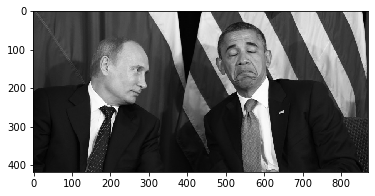

In [24]:
#call the function with a change in the scale factor

read_file('input00.txt', 1.2)

'3 face(s) detected in this file'

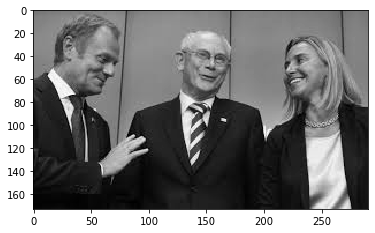

In [25]:
#call the function with a chnage in the scale factor

read_file('input01.txt', 1.005)

'5 face(s) detected in this file'

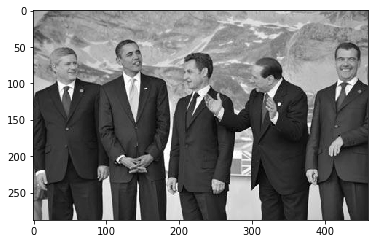

In [26]:
#call the function with a change in the scale factor

read_file('input02.txt', 1.01)